In [42]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os, sys
import glob

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [95]:
path = "/mnt/c/henryshawn/marketdata/ICO_data/adtoken_data"
# df_list = []
# for file in os.listdir(path):
#     df = pd.read_csv(file)
#     df_list.append(df)
# final_df = df.append(df for df in df_list)
# fianl_df.to_csv('final.csv', index=false)

allFiles = glob.glob(path + "/*/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col= "time_period_end",parse_dates=True)
#     df = pd.read_csv(file_, index_col= None, header= )
    list_.append(df)
frame = pd.concat(list_)
price_close = frame['price_close']

In [140]:
frame2 = frame
frame2 = frame2.drop(['volume_traded', 'price_open', 'price_high', 'price_low', 'trades_count'],1)
frame2

,price_close
time_period_end,
2017-07-04,0.000043
2017-07-05,0.000029
2017-07-06,0.000022
2017-07-07,0.000017
2017-07-08,0.000011
2017-07-09,0.000011
2017-07-10,0.000011
2017-07-11,0.000015
2017-07-12,0.000012


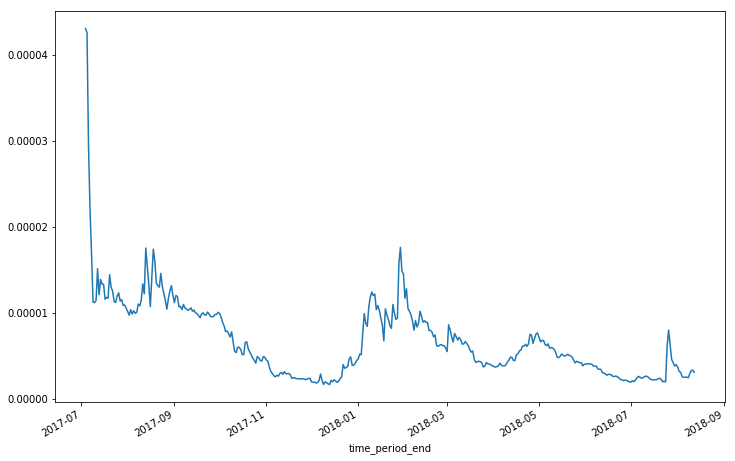

In [29]:
frame['price_open'].plot(figsize=(12,8))

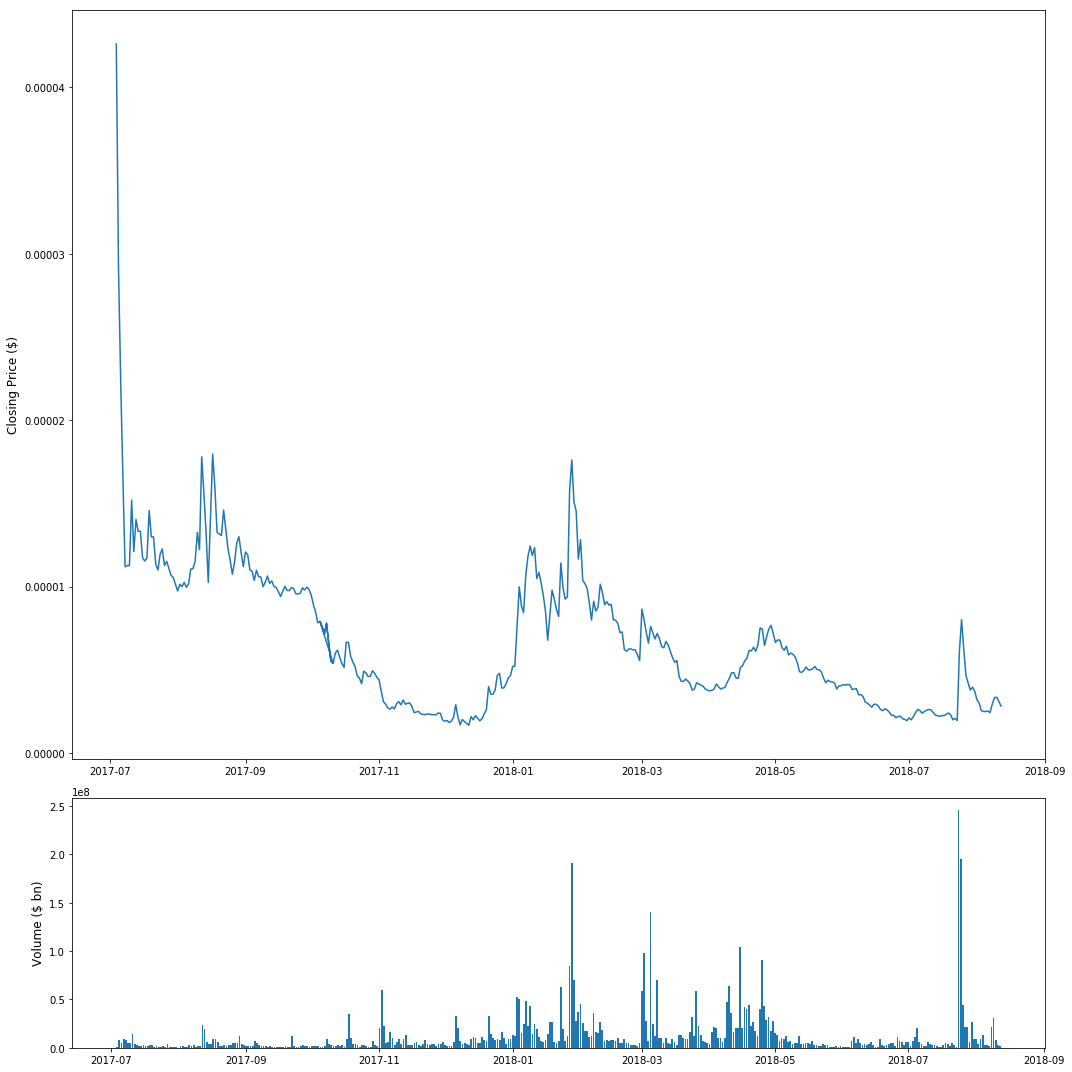

In [37]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(15, 15))
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax1.plot(frame['price_close'])
ax2.bar(frame.index, frame['volume_traded'])
fig.tight_layout()
plt.show()

In [146]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

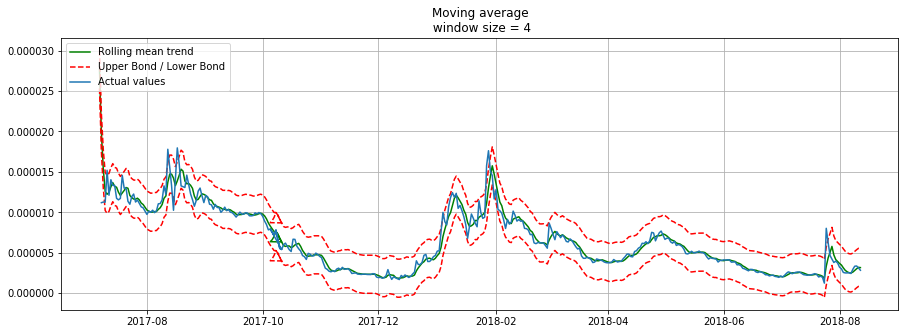

In [142]:
plotMovingAverage(frame_anomaly, 4, plot_intervals=True)

In [145]:
frame_anomaly = frame2.copy()
frame_anomaly.iloc[-20] = frame_anomaly.iloc[-100] * 0.2


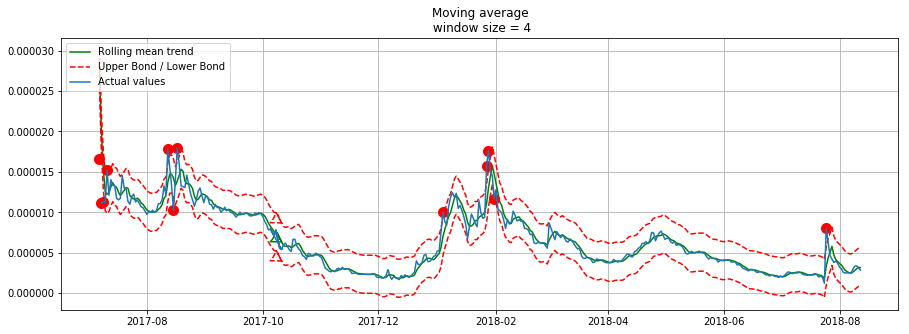

In [147]:
plotMovingAverage(frame_anomaly, 4, plot_intervals=True, plot_anomalies=True)

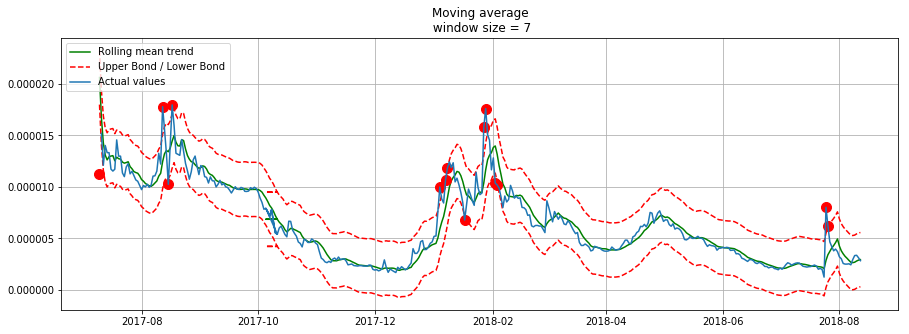

In [148]:
plotMovingAverage(frame_anomaly, 7, plot_intervals=True, plot_anomalies=True)

In [150]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)
  
weighted_average(frame2, [0.6, 0.3, 0.1])

3.235e-06

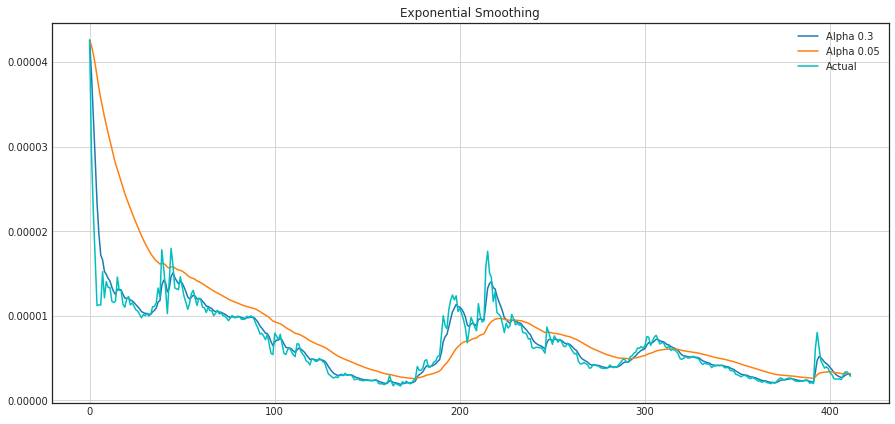

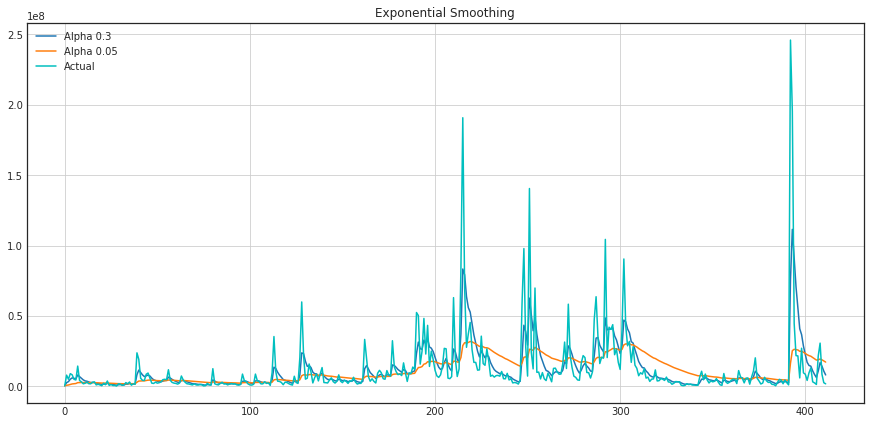

In [151]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
    
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);
        
plotExponentialSmoothing(frame['price_close'], [0.3, 0.05])
plotExponentialSmoothing(frame['volume_traded'], [0.3, 0.05])
